#### Solving fibbonaci seq using dynamic programming 

In [ ]:
def recursion(n):
    """recursion"""
    if n <= 1:
        return n
    return recursion(n - 1) + recursion(n - 2)


def memorisation(n, lookUp):
    """Memorisation"""
    if n <= 1:
        return n
    if n in lookUp:
        return lookUp[n]

    fibonacci = memorisation(n - 1, lookUp) + memorisation(n - 2, lookUp)
    lookUp[n] = fibonacci
    return lookUp[n]


def tabulation(n):
    """tabulation"""
    table = [0] * (n + 1) # table Ui
    table[0] = 0  # base case
    table[1] = 1  # base case
    for i in range(2, len(table)):
        table[i] = table[i - 1] + table[i - 2]
    return table[n]

# optimise tabulation without using array to save space
def optimiseTabulation(n):
    """tabulation"""
    prev2 = 0
    prev1 = 1
    current = None
    for i in range(2, n+1):
        current = prev2 + prev1
        prev2 = prev1
        prev1 = current
    return current

In [129]:
n = 10
lookUp = {}

In [130]:
print(recursion(n))
print(memorisation(n, lookUp))
print(tabulation(n))
print(optimiseTabulation(n))

55
55
55
55


#### You are climbing a staircase. It takes n steps to reach the top. Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

We are using fibonacci approach to solve ths problem

In [131]:
def climbingStairs(i, n):
    if i == n:
        return 1
    if i > n:
        return 0
    left = climbingStairs(i + 1, n)
    right = climbingStairs(i + 2, n)
    return left + right

In [132]:
n_ = 3
i_ = 0
climbingStairs(i_, n_)

3


Given a number of stairs and a frog, the frog wants to climb from the 0th stair to the (N-1)th stair. At a time the frog can climb either one or two steps. A height[N] array is also given. Whenever the frog jumps from a stair i to stair j, the energy consumed in the jump is abs(height[i]- height[j]), where abs() means the absolute difference. We need to return the minimum energy that can be used by the frog to jump from stair 0 to stair N-1.

![](https://lh6.googleusercontent.com/WLjOydAbeRWkwdBlTeAYyk5CIRu6d9foliQ1qwvBvcI5HLKo-dcLDJ84wCz8c8ZwdlZstoJmuFmJu-HhQXJYjCo8Ekym-wzX4zRQlTV40zsWoEGZl4OVnJugNp5sMCn2odSl9yoF)

In [162]:
def frogJump(height, index):
    """Recursion"""
    if index == 0 or index < 0:
        return 0

    left = frogJump(height, index - 1) + abs(height[index] - height[index - 1])
    right = frogJump(height, index - 2) + abs(height[index] - height[index - 2])
    return min(left, right)


def mFrogJump(height, index, loopUp):
    """Memorisation"""
    if index == 0 or index < 0:
        return 0
    if index in loopUp:
        return loopUp[index]

    left = mFrogJump(height, index - 1, loopUp) + abs(height[index] - height[index - 1])
    right = mFrogJump(height, index - 2, loopUp) + abs(height[index] - height[index - 2])
    loopUp[index] = min(left, right)
    return loopUp[index]


def tabulationFrogJump(height):
    """Tabulation"""
    table = [0] * len(height)
    table[0] = 0

    for i in range(1, len(table)):
        fs = table[i - 1] + abs(height[i] - height[i - 1])
        ss = table[i - 2] + abs(height[i] - height[i - 2])
        table[i] = min(fs, ss)

    return table[-1]


if __name__ == '__main__':
    height_ = [10, 20, 30, 10, 40, 60]
    index_ = len(height_) - 1
    loopUp_ = {}
    print(frogJump(height_, index_))
    print(mFrogJump(height_, index_, loopUp_))
    print(tabulationFrogJump(height_))

50
50
50


__Finding kth jump__

In [208]:
def kthJump(height, index, k):
    """finding the kth jump using recursion"""
    if index == 0 or index < 0 or k == 0:
        return 0
    minSteps = float('inf')
    for i in range(1, k + 1):
        if index - i >= 0:
            jump = kthJump(height, index - i, k) + abs(height[index] - height[index - i])
            minSteps = min(minSteps, jump)
    return minSteps




def tKthJump(height, k):
    """finding the kth jump using tabulation"""
    if k == 0:
        return 0
    table = [0] * (len(height))
    table[0] = 0
    for i in range(1, len(table)):
        minSteps = float('inf')
        for j in range(1, k + 1):
            if i - j >= 0:
                jump = table[i - j] + abs(height[i] - height[i - j])
                minSteps = min(jump, minSteps)
            else:
                break
        table[i] = minSteps
    return table[-1]


if __name__ == '__main__':
    height_ = [30, 10, 60, 10, 60, 50]
    index_ = len(height_) - 1
    lookUp_ = {}
    
    print(kthJump(height_, index_, 2))
    print(tKthJump(height_, 2))

40
40


#### Maximum sum of non-adjacent elements

`Problem Statement:`

Given an array of ‘N’  positive integers, we need to return the maximum sum of the subsequence such that no two elements of the subsequence are adjacent elements in the array.

`Note:` A subsequence of an array is a list with elements of the array where some elements are deleted ( or not deleted at all) and the elements should be in the same order in the subsequeExamples:n the array.

`Examples:`

![](https://lh6.googleusercontent.com/gQPoRaBGkwCKbJNy8cvXG2LBzD3khfxca938a6Zrph4HWQGLOxtVbDW3xO6WkDalQCBopYfBp5DX3oo_Drug3kRNBwhqDkYapMUu4LjwL_6_8dPot0h8ESZeMrbp1_3M_SW0zICR)

In [210]:
def maximumNonAdjacentSum(array, index):
    """Recursion"""
    if index == 0:
        return array[index]
    if index < 0:
        return 0
    pick = maximumNonAdjacentSum(array, index - 2) + array[index]
    notPick = maximumNonAdjacentSum(array, index - 1)
    return max(pick, notPick)


def mMaximumNonAdjacentSum(array, index, lookUp):
    """Memorisation"""
    if index == 0:
        return array[index]
    if index < 0:
        return 0
    if index in lookUp:
        return lookUp[index]

    pick = mMaximumNonAdjacentSum(array, index - 2, lookUp) + array[index]
    notPick = mMaximumNonAdjacentSum(array, index - 1, lookUp)
    lookUp[index] = max(pick, notPick)
    return lookUp[index]


def tMaximumNonAdjacentSum(array):
    """Tabulation"""
    table = [0] * len(array)
    table[0] = array[0]
    for i in range(1, len(table)):
        pick = array[i]
        if i > 1:
            pick += table[i - 2]
        notPick = 0 + table[i - 1]
        table[i] = max(pick, notPick)
    return table[-1]


def sMaximumNonAdjacentSum(array):
    """Tabulation with space optimisation"""
    prev1 = 0
    prev = array[0]

    for i in range(1, len(array)):
        pick = array[i]
        if i > 1:
            pick += prev1
        notPick = 0 + prev
        current = max(pick, notPick)
        prev1 = prev
        prev = current
    return prev


if __name__ == '__main__':
    array_ = [1, 2, 3, 1, 3, 5, 8, 1, 9]
    index_ = len(array_) - 1
    loopUp_ = {}
    s_ = 0
    print(maximumNonAdjacentSum(array_, index_))
    print(mMaximumNonAdjacentSum(array_, index_, loopUp_))
    print(tMaximumNonAdjacentSum(array_))
    print(sMaximumNonAdjacentSum(array_))

24
24
24
24


__Problem Statement__

Mr. X is a professional robber planning to rob houses along a street. Each house has a certain amount of money hidden. All houses along this street are arranged in a circle. That means the first house is the neighbor of the last one. Meanwhile, adjacent houses have a security system connected, and it will automatically contact the police if two adjacent houses were broken into on the same night.
You are given an array/list of non-negative integers 'ARR' representing the amount of money of each house. Your task is to return the maximum amount of money Mr. X can rob tonight without alerting the police.

<img src="https://lh5.googleusercontent.com/XG1_bncXs9qY3NldqFW-79mYZLwA84HZSsG58UaQR63ZatUYlRlUQ-0vFsCaEmPxBik4c9xftsYnzMZdtAlweBpvTZ0I3BBm9ZD_IVFkB-HAr7NuSTgf4jgzQsKV6qpgQyPu20zW"  width="500" height="300">


In [3]:
import time


def maximumAmountRob(array, index):
    """Recursion Solution"""
    def _maximumAmountRob(array_, index_):
        if index_ == 0:
            return array_[index_]
        if index_ < 0:
            return 0
        pick = _maximumAmountRob(array_, index_ - 2) + array_[index_]
        notPick = _maximumAmountRob(array_, index_ - 1)
        return max(pick, notPick)

    excludeFirst = array[1:]
    excludeLast = array[0: index]
    return max(_maximumAmountRob(excludeFirst, index - 1), _maximumAmountRob(excludeLast, index - 1))


def mMaximumAmountRob(array, index, lookUp):
    def _mMaximumAmountRob(array_, index_, lookUp_):
        """Memorisation"""
        if index_ == 0:
            return array_[index_]
        if index_ < 0:
            return 0
        if index_ in lookUp_:
            return lookUp_[index_]

        pick = _mMaximumAmountRob(array_, index_ - 2, lookUp_) + array_[index_]
        notPick = _mMaximumAmountRob(array_, index_ - 1, lookUp_)
        lookUp_[index_] = max(pick, notPick)
        return lookUp_[index_]

    excludeFirst = array[1:]
    excludeLast = array[0: index]
    return max(_mMaximumAmountRob(excludeFirst, index - 1, lookUp),
               _mMaximumAmountRob(excludeLast, index - 1, lookUp))


if __name__ == '__main__':
    arr = [*range(1, 20)]
    n = len(arr) - 1
    loopUp_ = {}
    s_ = 0

    start = time.time()
    print("Recursion", maximumAmountRob(arr, n))
    end = time.time()
    print(end - start)

    start = time.time()
    print("Memorisation", mMaximumAmountRob(arr, n, loopUp_))
    end = time.time()
    print(end - start)

Recursion 99
0.005424022674560547
Memorisation 99
4.696846008300781e-05


`Ninja’s Training`

A Ninja has an ‘N’ Day training schedule. He has to perform one of these three activities (Running, Fighting Practice, or Learning New Moves) each day. There are merit points associated with performing an activity each day. The same activity can’t be performed on two consecutive days. We need to find the maximum merit points the ninja can attain in N Days.

We are given a 2D Array POINTS of size ‘N*3’ which tells us the merit point of specific activity on that particular day. Our task is to calculate the maximum number of merit points that the ninja can earn.

![](https://lh3.googleusercontent.com/fGhKc0zD0hrkqCd-4jAGVuIiJgqFvyk1dSLmTiwWwTXmRmG_LoqpiaOwk1puC3jgVB_HZx3p0v0Ovq66QWwKhaYanSBF8yI09GLZwm-aumvQT8LPuSSvlDerGoN0uz2MyNhX8I67)

In [320]:
def maximumNumberOfMeritPoints(points, days, last):
    """Recursion"""
    if days == 0:
        maxi = 0
        for task in range(3):
            if task != last:
                maxi = max(maxi, points[0][task])
        return maxi
    maxi = 0
    for task in range(3):
        if task != last:
            point = points[days][task] + maximumNumberOfMeritPoints(points=points, days=days - 1, last=task)
            maxi = max(maxi, point)
    return maxi


def mMaximumNumberOfMeritPoints(points, days, last, lookUp):
    """Memorisation"""
    if days == 0:
        maxi = 0
        for task in range(3):
            if task != last:
                maxi = max(maxi, points[0][task])
        return maxi

    if lookUp[days][last] != -1:
        # print(lookUp)
        return lookUp[days][last]

    maxi = 0
    for task in range(3):
        if task != last:
            point = points[days][task] + mMaximumNumberOfMeritPoints(points=points, days=days - 1, last=task,
                                                                     lookUp=lookUp)
            maxi = max(maxi, point)
        lookUp[days][last] = maxi
    return lookUp[days][last]


def tMaximumNumberOfMeritPoints(points, n):
    """Tabulation"""
    table = [[0] * (len(points) + 1) for _ in range(len(points))]  # table

    table[0][0] = max(points[0][1], points[0][2])
    table[0][1] = max(points[0][0], points[0][2])
    table[0][2] = max(points[0][0], points[0][1])
    table[0][3] = max(points[0][0], points[0][1] and points[0][2])

    for day in range(1, n):
        for last in range(n + 1):
            table[day][last] = 0
            for task in range(n):
                if task != last:
                    activity = points[day][task] + table[day - 1][task]
                    table[day][last] = max(table[day][last], activity)
    return table[len(points) - 1][len(points)]


if __name__ == '__main__':
    points_ = [
        [10, 40, 70],
        [20, 50, 80],
        [30, 60, 90]
    ]
    days_ = len(points_) - 1
    last_ = len(points_)
    n_ = len(points_)
    lookUp_ = [[-1] * (len(points_) + 1) for _ in range(len(points_))]
    print(maximumNumberOfMeritPoints(points_, days_, last_))
    print(mMaximumNumberOfMeritPoints(points_, days_, last_, lookUp_))
    print(tMaximumNumberOfMeritPoints(points_, n_))

210
210
210


`Unique paths`

Given two values M and N, which represent a matrix[M][N]. We need to find the total unique paths from the top-left cell (matrix[0][0]) to the rightmost cell (matrix[M-1][N-1]).

In [6]:
import time


def gridUniquePaths(row, column):
    if row == 0 and column == 0:
        return 1
    if row < 0 or column < 0:
        return 0

    up = gridUniquePaths(row, column - 1)
    left = gridUniquePaths(row - 1, column)
    return up + left


def mGridUniquePaths(path, column, row, lookUp):
    if row == 0 and column == 0:
        return 1
    if row < 0 or column < 0:
        return 0

    if lookUp[column][row] != -1:
        return lookUp[column][row]

    up = mGridUniquePaths(path, column - 1, row, lookUp)
    left = mGridUniquePaths(path, column, row - 1, lookUp)
    lookUp[column][row] = up + left
    return lookUp[column][row]


def tGridUniquePaths(mm=7, nn=3):
    table = [[0] * mm for _ in range(nn)]
    for column in range(nn):
        for row in range(mm):
            if column == 0 and row == 0:
                table[0][0] = 1
                continue
            down = 0
            right = 0
            if column > 0:
                down = table[column - 1][row]
            if row > 0:
                right = table[column][row - 1]
            table[column][row] = down + right
    return table[nn - 1][mm - 1]


if __name__ == '__main__':
    m = 7
    n = 3
    path_ = [[0] * m for _ in range(n)]
    lookUp_ = [[-1] * m for _ in range(n)]
    m = m - 1
    n = n - 1

    start = time.time()
    print(gridUniquePaths(m, n), end=' ')
    end = time.time()
    print('Recursion time is', end - start)
    
    start = time.time()
    print(mGridUniquePaths(path_, n, m, lookUp_), end=' ')
    end = time.time()
    print('Memorisation time is', end - start)

    start = time.time()
    print(tGridUniquePaths(), end=' ')
    end = time.time()
    print('Tabulation time is', end - start)

28 Recursion time is 0.00027179718017578125
28 Memorisation time is 3.695487976074219e-05
28 Tabulation time is 3.0994415283203125e-05


`Paths with obstacles`

Given a ‘N’ * ’M’ maze with obstacles, count and return the number of unique paths to reach the right-bottom cell from the top-left cell. A cell in the given maze has a value '-1' if it is a blockage or dead-end, else 0. From a given cell, we are allowed to move to cells (i+1, j) and (i, j+1) only. Since the answer can be large, print it modulo 10^9 + 7.

In [8]:
import time


def gridUniquePaths(path, row, column):
    if row == 0 and column == 0:
        return 1
    if row < 0 or column < 0 or path[row][column] == -1:
        return 0

    up = gridUniquePaths(path, row, column - 1)
    left = gridUniquePaths(path, row - 1, column)
    return up + left


def mGridUniquePaths(path, column, row, lookUp):
    if row == 0 and column == 0:
        return 1
    if row < 0 or column < 0 or path[row][column] == -1:
        return 0
    if lookUp[column][row] != -1:
        return lookUp[column][row]

    up = mGridUniquePaths(path, column - 1, row, lookUp)
    left = mGridUniquePaths(path, column, row - 1, lookUp)
    lookUp[column][row] = up + left
    return lookUp[column][row]


def tGridUniquePaths(mm=3, nn=3):
    table = [[0, 0, 0], [0, -1, 0], [0, 0, 0]]
    for column in range(nn):
        for row in range(mm):
            if table[row][column] == -1:
                table[row][column] = 0
                continue
            if column == 0 and row == 0:
                table[0][0] = 1
                continue
            down = 0
            right = 0
            if column > 0:
                down = table[column - 1][row]
            if row > 0:
                right = table[column][row - 1]
            table[column][row] = down + right
    return table[nn - 1][mm - 1]


if __name__ == '__main__':
    m = 3
    n = 3
    path_ = [[0, 0, 0], [0, -1, 0], [0, 0, 0]]
    lookUp_ = [[-1] * m for _ in range(n)]
    m = m - 1
    n = n - 1

    start = time.time()
    print(gridUniquePaths(path_, m, n), end=' ')
    end = time.time()
    print('Recursion time is', end - start)

    start = time.time()
    print(mGridUniquePaths(path_, n, m, lookUp_), end=' ')
    end = time.time()
    print('Memorisation time is', end - start)

    start = time.time()
    print(tGridUniquePaths(), end=' ')
    end = time.time()
    print('Tabulation time is', end - start)

2 Recursion time is 8.606910705566406e-05
2 Memorisation time is 4.696846008300781e-05
2 Tabulation time is 4.315376281738281e-05


`Ninjaland is a country` in the shape of a 2-Dimensional grid 'GRID', with 'N' rows and 'M' columns. Each point in the grid has some cost associated with it.
Find a path from top left i.e. (0, 0) to the bottom right i.e. ('N' - 1, 'M' - 1) which minimizes the sum of the cost of all the numbers along the path. You need to tell the minimum sum of that path.


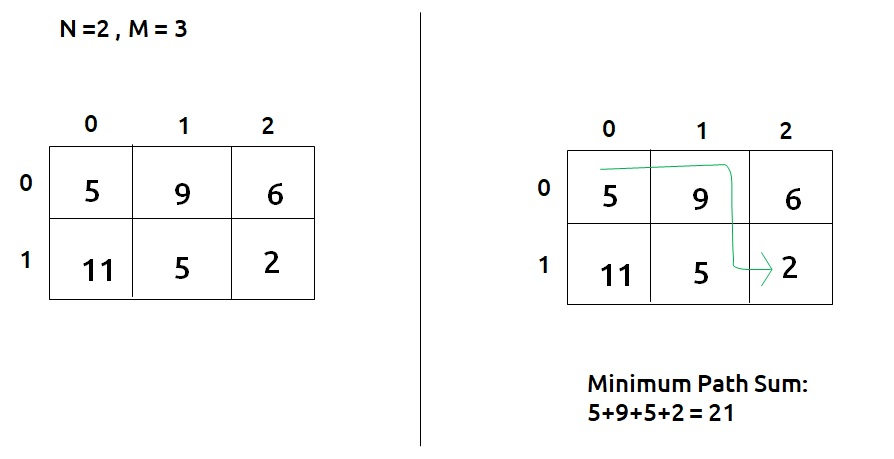

In [20]:
import time


def minimumPathSum(path, column, row):
    if row == 0 and column == 0:
        return path[column][row]
    if row < 0 or column < 0:
        return float('inf')

    up = minimumPathSum(path, column-1, row) + path[column][row]
    left = minimumPathSum(path, column, row-1) + path[column][row]
    return min(up, left)


def mMinimumPathSum(path, column, row, lookUp):
    if row == 0 and column == 0:
        return path[0][0]
    if row < 0 or column < 0:
        return float('inf')
    if lookUp[column][row] != -1:
        return lookUp[column][row]

    up = mMinimumPathSum(path, column - 1, row, lookUp) + path[column][row]
    left = mMinimumPathSum(path, column, row - 1, lookUp) + path[column][row]
    lookUp[column][row] = min(up, left)
    return lookUp[column][row]


def tMinimumPathSum(path, mm=3, nn=5):
    table = [[0] * mm for _ in range(nn)]
    for column in range(nn):
        for row in range(mm):
            if column == 0 and row == 0:
                table[column][row] = path[column][row]
                continue
            down = float('inf')
            if column > 0:
                down = table[column-1][row] + path[column][row]
            right = float('inf')
            if row > 0:
                right = table[column][row-1] + path[column][row]
            table[column][row] = min(down, right)
    return table[nn - 1][mm - 1]


if __name__ == '__main__':
    m = 3
    n = 5
    path_ = [[5, 12, 16], 
             [15, 90, 6], 
             [11, 5, 11], 
             [5, 12, 16], 
             [11, 5, 200]]
    lookUp_ = [[-1] * m for _ in range(n)]

    m = m - 1
    n = n - 1

    start = time.time()
    print(minimumPathSum(path_, n, m), end=' ')
    end = time.time()
    print('Recursion time is', end - start)

    start = time.time()
    print(mMinimumPathSum(path_, n, m, lookUp_), end=' ')
    end = time.time()
    print('Memorisation time is', end - start)

    start = time.time()
    print(tMinimumPathSum(path=path_), end=' ')
    end = time.time()
    print('Tabulation time is', end - start)

252 Recursion time is 0.00013709068298339844
252 Memorisation time is 3.5762786865234375e-05
252 Tabulation time is 3.2901763916015625e-05


You are given a triangular array/list `TRIANGLE`. Your task is to return the minimum path sum to reach from the top to the bottom row.
The triangle array will have N rows and the i-th row, where 0 <= i < N will have i + 1 elements.
You can move only to the adjacent number of row below each step. For example, if you are at index j in row i, then you can move to i or i + 1 index in row j + 1 in each step.

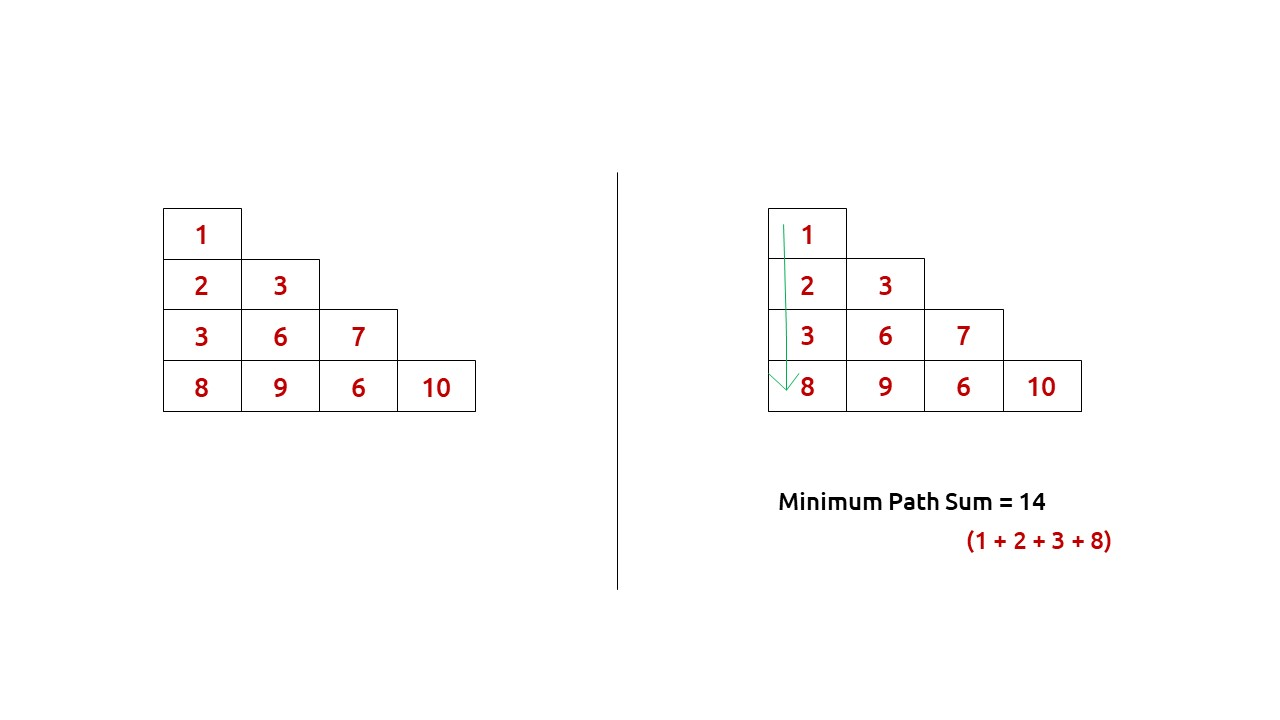

`Solution`


We have a fixed starting point in this problem so we cannot start from `N-1` to `M-1` as we did in the previous examples.

In [106]:
def triangleMinimumSum(triangle, column, row):
    if column == len(triangle) - 1:
        return triangle[column][row]

    down = triangleMinimumSum(triangle, column + 1, row) + triangle[column][row]
    diagonal = triangleMinimumSum(triangle, column + 1, row + 1) + triangle[column][row]
    return min(down, diagonal)


def mTriangleMinimumSum(triangle, column, row, lookUp):
    if column == len(triangle) - 1:
        return triangle[column][row]

    if lookUp[column][row] != -1:
        return lookUp[column][row]

    down = mTriangleMinimumSum(triangle, column + 1, row, lookUp) + triangle[column][row]
    diagonal = mTriangleMinimumSum(triangle, column + 1, row + 1, lookUp) + triangle[column][row]
    lookUp[column][row] = min(down, diagonal)
    return lookUp[column][row]


def tTriangleMinimumSum(triangle):
    table = [[0] * len(triangle) for _ in range(len(triangle))]
    n = len(triangle)
    for row in range(n):
        table[n - 1][row] = triangle[n - 1][row]

    for column in range(n - 2, -1, -1):
        for row in range(column, -1, -1):
            down = table[column + 1][row] + triangle[column][row]
            diagonal = table[column + 1][row + 1] + triangle[column][row]
            table[column][row] = min(down, diagonal)
    return table[0][0]


if __name__ == '__main__':
    t = [
        [1],
        [2, 3],
        [4, 5, 6],
        [7, 8, 9, 10],
        [11, 12, 13, 14, 15],
        [111, 122, 13, 45, 15, 90],
        [1111, 1221, 131, 145, 151, 90, 11]
    ]
    c = 0
    r = 0
    lookUp_ = [[-1] * len(t) for _ in range(len(t))]
    print(triangleMinimumSum(triangle=t, column=c, row=r))
    print(mTriangleMinimumSum(triangle=t, column=c, row=r, lookUp=lookUp_))
    print(tTriangleMinimumSum(t))

136
136
136


You have been given an N*M matrix filled with integer numbers, find the maximum sum that can be obtained from a path starting from any cell in the first row to any cell in the last row.
From a cell in a row, you can move to another cell directly below that row, or diagonally below left or right. So from a particular cell (row, col), we can move in three directions i.e.

`Down`: (row+1,col)

`Down left diagonal`: (row+1,col-1)

`Down right diagonal`: (row+1, col+1)

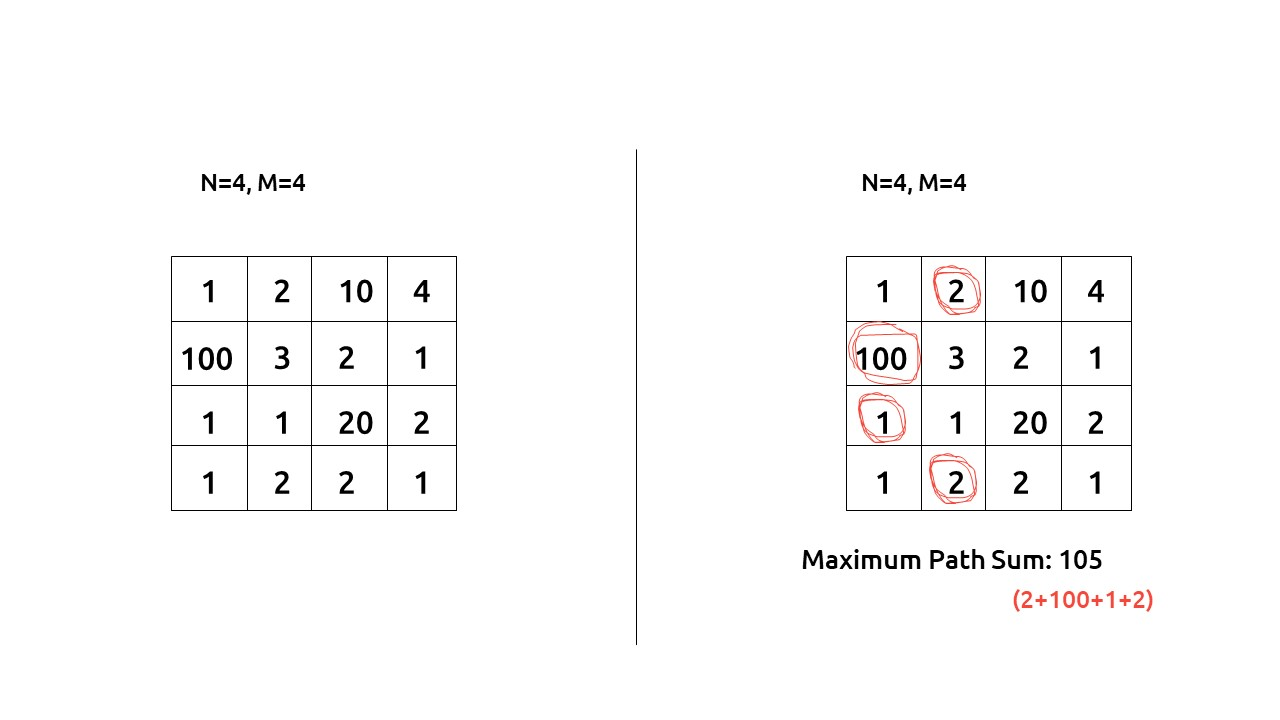

In [107]:
def maxPathSum(p, c, r):
    def maxPathSumUtil(path, column, row):
        # out of bound is always going to return min value so we don't need to take it
        if row < 0 or row > 3:
            return float('-inf')
        if column == 0:
            return path[column][row]

        up = maxPathSumUtil(path, column - 1, row) + path[column][row]
        leftDiagonal = maxPathSumUtil(path, column - 1, row - 1) + path[column][row]
        rightDiagonal = maxPathSumUtil(path, column - 1, row + 1) + path[column][row]
        return max(up, leftDiagonal, rightDiagonal)

    maximum = float('-inf')
    for rw in range(r + 1):
        answer = maxPathSumUtil(path=p, column=c, row=rw)
        maximum = max(maximum, answer)
    return maximum


def mMaxPathSum(p, c, r, lk):
    """Memorisation"""

    def maxPathSumUtil(path, column, row, lookUp):
        if row < 0 or row > 3:
            return float('-inf')
        if column == 0:
            return path[column][row]

        if lookUp[column][row] != -1:
            return lookUp[column][row]

        up = maxPathSumUtil(path, column - 1, row, lookUp) + path[column][row]
        leftDiagonal = maxPathSumUtil(path, column - 1, row - 1, lookUp) + path[column][row]
        rightDiagonal = maxPathSumUtil(path, column - 1, row + 1, lookUp) + path[column][row]
        lookUp[column][row] = max(up, leftDiagonal, rightDiagonal)
        return lookUp[column][row]

    maximum = float('-inf')
    for rw in range(r + 1):
        answer = maxPathSumUtil(path=p, column=c, row=rw, lookUp=lk)
        maximum = max(maximum, answer)
    return maximum


def tMaxPathSumUtil(path, column=4, row=4):
    table = [[0] * row for _ in range(column)]
    """base case"""
    for i in range(row):
        table[0][i] = path[0][i]

    for c in range(1, column):
        for r in range(row):
            up = table[c - 1][r] + path[c][r]
            leftDiagonal = float('-inf')
            if r > 0:
                leftDiagonal = table[c - 1][r - 1] + path[c][r]
            rightDiagonal = float('-inf')
            if r < 3:
                rightDiagonal = table[c - 1][r + 1] + path[c][r]
            table[c][r] = max(up, leftDiagonal, rightDiagonal)
    return table


def tMaxPathSum(path, c=4, r=4):
    table = tMaxPathSumUtil(path, column=c, row=r)
    maximum = table[c-1][0]
    for cr in range(1, r):
        maximum = max(maximum, table[c-1][cr])
    return maximum


if __name__ == '__main__':
    path_ = [
        [1, 2, 10, 4],
        [100, 3, 2, 1],
        [1, 1, 20, 2],
        [1, 2, 2, 1]
    ]
    m = 3
    n = 3
    lookUp_ = [[-1] * 4 for _ in range(4)]
    print(maxPathSum(path_, m, n))
    print(mMaxPathSum(path_, m, n, lookUp_))
    print(tMaxPathSum(path_))

105
105
105


`Ninja` has a 'GRID' of size 'R' X 'C'. Each cell of the grid contains some chocolates. Ninja has two friends Alice and Bob, and he wants to collect as many chocolates as possible with the help of his friends.
Initially, Alice is in the top-left position i.e. (0, 0), and Bob is in the top-right place i.e. (0, ‘C’ - 1) in the grid. Each of them can move from their current cell to the cells just below them. When anyone passes from any cell, he will pick all chocolates in it, and then the number of chocolates in that cell will become zero. If both stay in the same cell, only one of them will pick the chocolates in it.
If Alice or Bob is at (i, j) then they can move to (i + 1, j), (i + 1, j - 1) or (i + 1, j + 1). They will always stay inside the ‘GRID’.
Your task is to find the maximum number of chocolates Ninja can collect with the help of his friends by following the above rules.

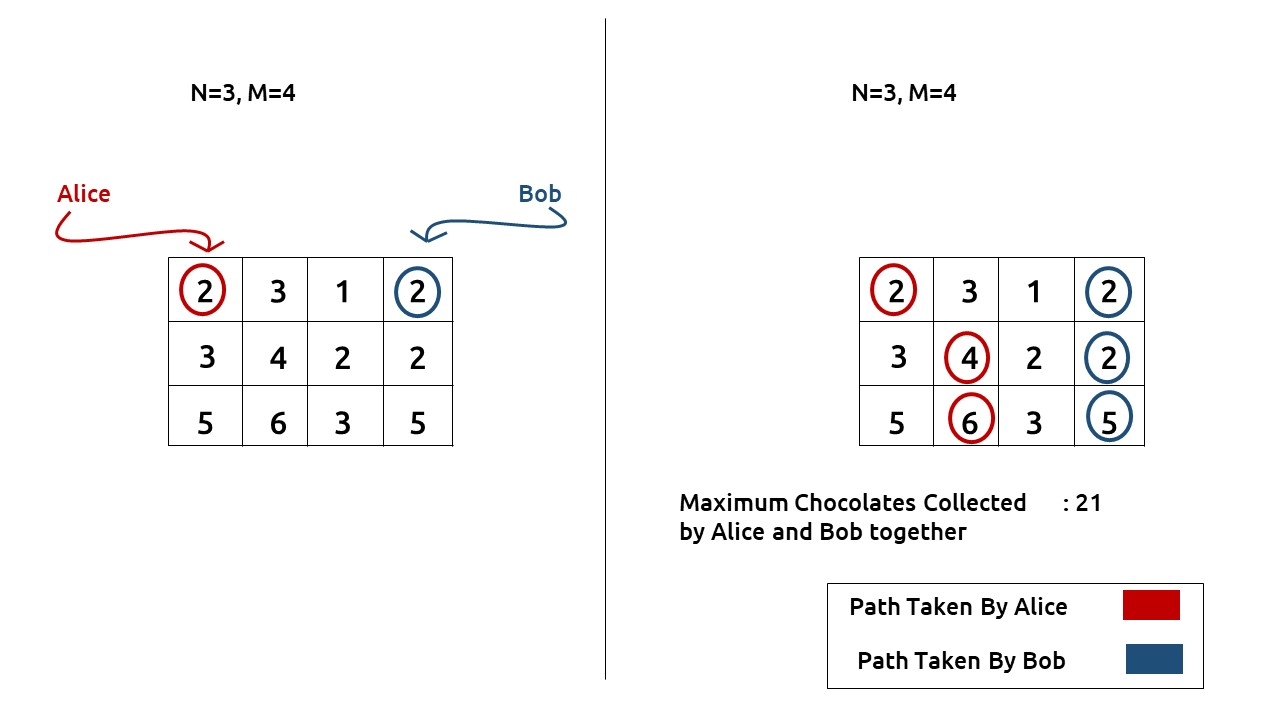